In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from scipy import special
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [3]:
df = pd.read_csv(r'C:\Users\Joao\Desktop\Projetos\Projetos Ciencia de Dados\1. Predição de Churn de Clientes\WA_Fn-UseC_-Telco-Customer-Churn.xls')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [10]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

customerID -- 7043
gender -- 2
SeniorCitizen -- 2
Partner -- 2
Dependents -- 2
tenure -- 73
PhoneService -- 2
MultipleLines -- 3
InternetService -- 3
OnlineSecurity -- 3
OnlineBackup -- 3
DeviceProtection -- 3
TechSupport -- 3
StreamingTV -- 3
StreamingMovies -- 3
Contract -- 3
PaperlessBilling -- 2
PaymentMethod -- 4
MonthlyCharges -- 1585
TotalCharges -- 6531
Churn -- 2


In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.append('SeniorCitizen')
print(categorical_cols)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


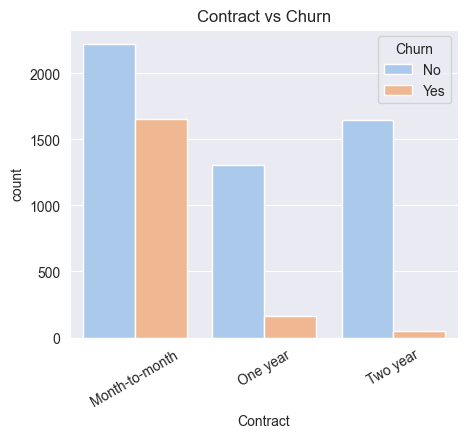

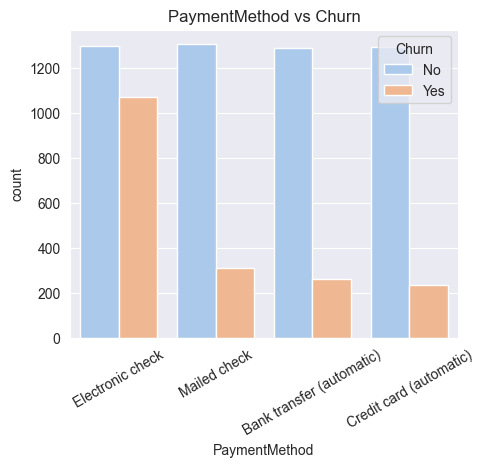

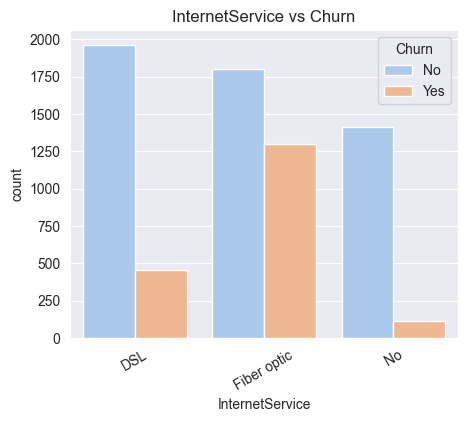

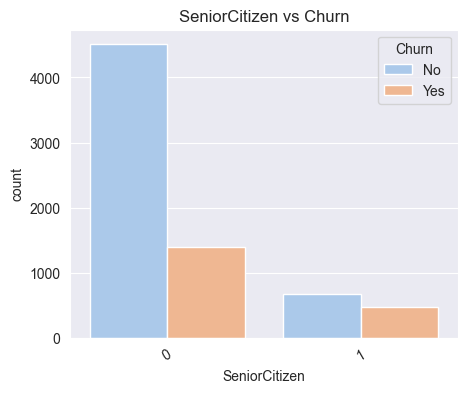

In [ ]:
important_cats = ['Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen']

sns.set_style("darkgrid")
sns.set_palette("pastel")

for col in important_cats:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, data=df, hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=30)
    plt.show()

In [14]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[num_cols].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


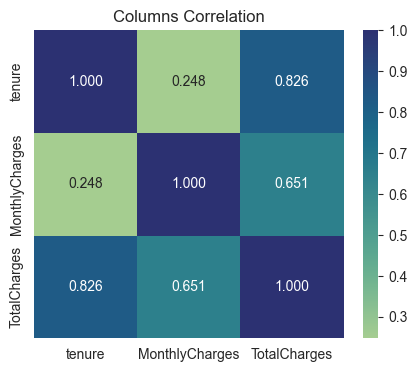

In [20]:
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="crest", fmt=".3f")
plt.title("Columns Correlation")
plt.show()

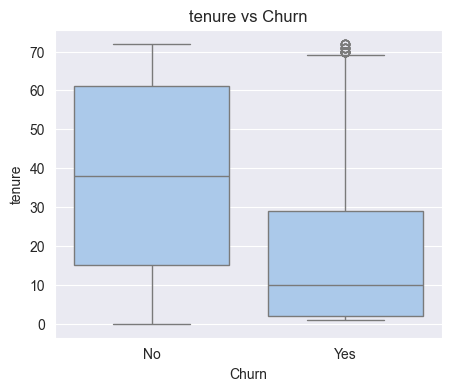

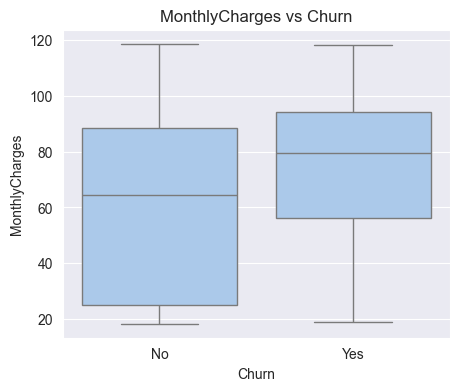

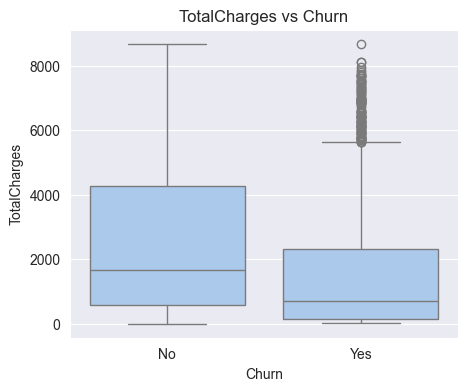

In [21]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()